# Propeller Speed

In [58]:
import os
import sys
from pathlib import Path
cwd = !pwd
pagedir = Path(cwd[0])

projpath = pagedir / ".." / ".."
projdir = projpath.absolute().as_posix()
if not projdir in sys.path:
        sys.path.insert(0,projdir)

In [59]:
import pint
u = pint.UnitRegistry()
from mmtime.data.models.wart import data
wart = data.Wart(u)
mdata = wart.model_data()
w_m = mdata['weights']['rubber']
K_m = 30000 * u.inch
E = K_m * w_m * u.gravity
E.to('ft*lbf')

4.739938636974868 <Unit('foot * force_pound')>

In [60]:
def torque(n, Qm,x1,y1,x2,y2,Nm):
    M = (y2 - y1)/(x2 - x1)
    if n<x1: 
        A = (M*x1 + Qm - y1)/x1**2
        B = (-M*x1 - 2*Qm + 2*y1)/x1
        C = Qm
        return A*n**2 + B*n + C
    elif n < x2:
        M = (y2 - y1)/(x2 - x1)
        return y1 + M*(n - x1)
    else:
        xp = Nm-n
        A = (-M*Nm + M*x2 - y2)/(Nm**2 - 2*Nm*x2 + x2**2)
        B = (-M*Nm + M*x2 - 2*y2)/(-Nm + x2)
        C = 0
        return A*xp**2 + B*xp + C

In [61]:
Weights = [0.90,0.98,0.83,0.88,
               0.94,0.81,0.81,0.80,
               0.55,0.61,0.61,0.58,
               0.8,0.84] * u.grams

In [62]:
Turns = [3375,3570,3860,3820,
         4050,3785,3740,3640,
         2425,1775,1800,1885,
         1750,2400]

In [63]:
Time = [531,536,550,594,
        613,614,594,588,
        276,269,280,256,
        258,248]*u.seconds

In [64]:
Lengths = [17.5,18.0,18.0,19.0,
          19.0,18.0,18.0,18.0,
          14.0,14.5,14.5,14.0,
          17.5,17.5]*u.inches

In [65]:
Torque = [3.3,3.4,3.2,2.8,
          3.0,2.9,2.9,2.8,
          0.75,0.4,0.4,0.55,
          0.55,0.6] * u.inch * u.ounces

In [66]:
Torque.to_base_units()

Magnitude,[0.0023762570283375004 0.0024482648170750004 0.0023042492396000004 0.0020162180846500003 0.0021602336621250003 0.0020882258733875003 0.0020882258733875003 0.0020162180846500003 0.0005400584155312501 0.00028803115495000005 0.00028803115495000005 0.0003960428380562501 0.0003960428380562501 0.0004320467324250001]
Units,kilogram meter


In [67]:
T_W = Torque/Weights/Lengths
T_W

Magnitude,[0.20952380952380953 0.1927437641723356 0.21419009370816602 0.16746411483253587 0.167973124300112 0.1989026063100137 0.1989026063100137 0.19444444444444442 0.0974025974025974 0.04522328999434709 0.04522328999434709 0.06773399014778327 0.039285714285714285 0.04081632653061225]
Units,ounce/gram


In [68]:
Navg = (Turns/Time)
Navg

Magnitude,[6.3559322033898304 6.66044776119403 7.0181818181818185 6.430976430976431 6.6068515497553015 6.164495114006515 6.296296296296297 6.190476190476191 8.78623188405797 6.598513011152416 6.428571428571429 7.36328125 6.782945736434108 9.67741935483871]
Units,1/second


In [69]:
N_Q = Navg/Torque
N_Q

Magnitude,[1.926040061633282 1.9589552238805972 2.1931818181818183 2.296777296777297 2.202283849918434 2.1256879703470744 2.171136653895275 2.2108843537414966 11.714975845410628 16.49628252788104 16.07142857142857 13.38778409090909 12.332628611698377 16.129032258064516]
Units,1/(inch ounce second)


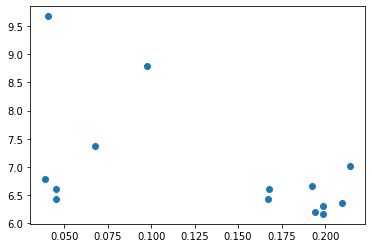

In [70]:
import matplotlib.pyplot as plt
plt.scatter(T_W, Navg)

In [71]:
def max_turns(length, weight):
    K = 8.48597 * u.ounce**0.5/u.inch**1.5
    Nmax = K * length / (weight/length)**0.5
    return Nmax

Let's wind to 95% of the maximum allowed turns:

In [72]:
motor_weight = 0.86 * u.grams
motor_length = 18.0 * u.inches
winding_turns = 0.95 * max_turns(motor_length, motor_weight)
winding_turns.to_base_units()

3534.7402756112 <Unit('dimensionless')>

Using the BET function, get the RPM needed for level flight. From the above experiment, I got about:

In [74]:
Level_Flight_RPM =  6.51456*60 / u.minute
Level_Flight_RPM

390.8736 <Unit('1 / minute')>

In [75]:
def torque(n, Qm,x1,y1,x2,y2,Nm):
    M = (y2 - y1)/(x2 - x1)
    if n<x1: 
        A = (M*x1 + Qm - y1)/x1**2
        B = (-M*x1 - 2*Qm + 2*y1)/x1
        C = Qm
        return A*n**2 + B*n + C
    elif n < x2:
        M = (y2 - y1)/(x2 - x1)
        return y1 + M*(n - x1)
    else:
        xp = Nm-n
        A = (-M*Nm + M*x2 - y2)/(Nm**2 - 2*Nm*x2 + x2**2)
        B = (-M*Nm + M*x2 - 2*y2)/(-Nm + x2)
        C = 0
        return A*xp**2 + B*xp + C